In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Fetch dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
obesity_level = fetch_ucirepo(id=544)

# data (as pandas dataframes) 

x = obesity_level.data.features
y = obesity_level.data.targets


features_df = pd.DataFrame(obesity_level['data']['features']) # This only has features
targets_df = pd.DataFrame(obesity_level['data']['targets']) # This only has targets


frames = [features_df, targets_df]
df = pd.concat(frames, axis=1)

#Drops duplicates
df.drop_duplicates(inplace=True)

#Drops NaN
df.dropna(axis=1, inplace=True)

print(df.shape)

df.nunique()


(2087, 17)


Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
pd.set_option('display.max_columns', None)

# print(df.dtypes)
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [44]:

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


print(df.head())



   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


In [45]:
df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.050641,0.626748,0.163176,0.113492,0.061220,-0.271575,0.077863,0.074564,0.045501,0.095129,-0.102435,0.189471,0.022356,0.010574,-0.139044,0.014699
Age,0.050641,1.000000,-0.031748,0.198160,0.200379,0.063895,0.013572,-0.055823,0.092097,0.091261,-0.044058,-0.117959,-0.148202,-0.302927,-0.045565,-0.601476,0.238308
Height,0.626748,-0.031748,1.000000,0.457468,0.232258,0.180694,-0.040363,0.227806,0.058001,0.054326,0.220487,-0.137078,0.293584,0.041808,-0.135756,-0.068258,0.038700
Weight,0.163176,0.198160,0.457468,1.000000,0.492969,0.274655,0.216574,0.092149,0.300271,0.024369,0.203823,-0.205409,-0.056490,-0.079351,-0.211351,0.009836,0.388802
family_history_with_overweight,0.113492,0.200379,0.232258,0.492969,1.000000,0.214329,0.033199,0.028411,0.207738,0.014885,0.168627,-0.193947,-0.062937,0.002314,0.028403,-0.092730,0.330391
FAVC,0.061220,0.063895,0.180694,0.274655,0.214329,1.000000,-0.025419,-0.006398,0.147921,-0.050713,0.002993,-0.191277,-0.111184,0.071505,-0.087661,-0.069422,0.041023
FCVC,-0.271575,0.013572,-0.040363,0.216574,0.033199,-0.025419,1.000000,0.034885,-0.038565,0.013716,0.081332,0.071179,0.022003,-0.104128,-0.063132,0.069012,0.025728
NCP,0.077863,-0.055823,0.227806,0.092149,0.028411,-0.006398,0.034885,1.000000,-0.072316,0.005009,0.075335,-0.020461,0.127816,0.015693,-0.082985,-0.043648,-0.088235
CAEC,0.074564,0.092097,0.058001,0.300271,0.207738,0.147921,-0.038565,-0.072316,1.000000,-0.054960,0.114801,-0.109393,-0.034803,-0.036708,-0.039502,-0.058158,0.314510
SMOKE,0.045501,0.091261,0.054326,0.024369,0.014885,-0.050713,0.013716,0.005009,-0.054960,1.000000,-0.031642,0.047384,0.010811,0.016491,-0.083181,-0.009995,-0.023341


In [46]:

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numeric columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


features_df = df.drop(columns=['NObeyesdad'])
targets_df = df['NObeyesdad']

print(df.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0 -0.526613 -0.887408 -0.872985                               1     0   
1       0 -0.526613 -1.960788 -1.178508                               1     0   
2       1 -0.212507  1.044677 -0.376509                               1     0   
3       1  0.415705  1.044677  0.005395                               0     0   
4       1 -0.369560  0.830001  0.112328                               0     0   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0 -0.788364  0.390906     2      0 -0.007810    0 -1.186977  0.554211     3   
1  1.082164  0.390906     2      1  1.636552    1  2.328908 -1.090505     2   
2 -0.788364  0.390906     2      0 -0.007810    0  1.156947  0.554211     1   
3  1.082164  0.390906     2      0 -0.007810    0  1.156947 -1.090505     1   
4 -0.788364 -2.225418     2      0 -0.007810    0 -1.186977 -1.090505     2   

   MTRANS  NObeyesdad  
0       3     

In [47]:
df.corr()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.050641,0.626748,0.163176,0.113492,0.061220,-0.271575,0.077863,0.074564,0.045501,0.095129,-0.102435,0.189471,0.022356,0.010574,-0.139044,0.014699
Age,0.050641,1.000000,-0.031748,0.198160,0.200379,0.063895,0.013572,-0.055823,0.092097,0.091261,-0.044058,-0.117959,-0.148202,-0.302927,-0.045565,-0.601476,0.238308
Height,0.626748,-0.031748,1.000000,0.457468,0.232258,0.180694,-0.040363,0.227806,0.058001,0.054326,0.220487,-0.137078,0.293584,0.041808,-0.135756,-0.068258,0.038700
Weight,0.163176,0.198160,0.457468,1.000000,0.492969,0.274655,0.216574,0.092149,0.300271,0.024369,0.203823,-0.205409,-0.056490,-0.079351,-0.211351,0.009836,0.388802
family_history_with_overweight,0.113492,0.200379,0.232258,0.492969,1.000000,0.214329,0.033199,0.028411,0.207738,0.014885,0.168627,-0.193947,-0.062937,0.002314,0.028403,-0.092730,0.330391
FAVC,0.061220,0.063895,0.180694,0.274655,0.214329,1.000000,-0.025419,-0.006398,0.147921,-0.050713,0.002993,-0.191277,-0.111184,0.071505,-0.087661,-0.069422,0.041023
FCVC,-0.271575,0.013572,-0.040363,0.216574,0.033199,-0.025419,1.000000,0.034885,-0.038565,0.013716,0.081332,0.071179,0.022003,-0.104128,-0.063132,0.069012,0.025728
NCP,0.077863,-0.055823,0.227806,0.092149,0.028411,-0.006398,0.034885,1.000000,-0.072316,0.005009,0.075335,-0.020461,0.127816,0.015693,-0.082985,-0.043648,-0.088235
CAEC,0.074564,0.092097,0.058001,0.300271,0.207738,0.147921,-0.038565,-0.072316,1.000000,-0.054960,0.114801,-0.109393,-0.034803,-0.036708,-0.039502,-0.058158,0.314510
SMOKE,0.045501,0.091261,0.054326,0.024369,0.014885,-0.050713,0.013716,0.005009,-0.054960,1.000000,-0.031642,0.047384,0.010811,0.016491,-0.083181,-0.009995,-0.023341


In [48]:
features_df.drop(columns=["Gender", "Height", "FAVC", "FCVC", "SMOKE", "MTRANS"], inplace=True)

df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

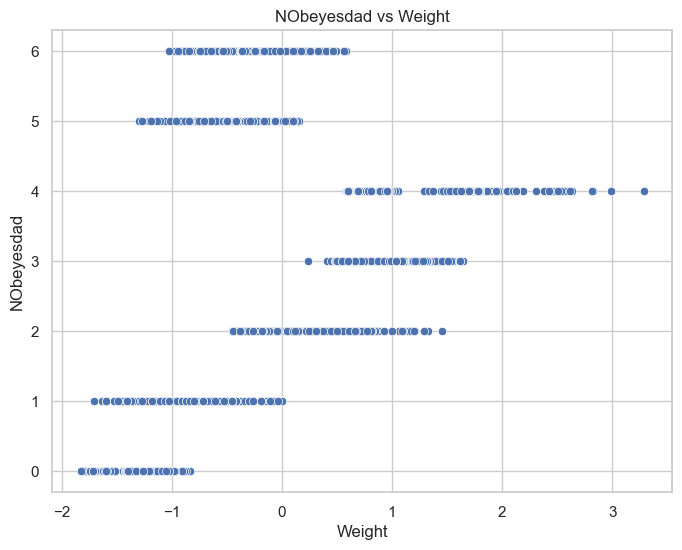

In [59]:
# NObeyesdad vs Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Weight'], y=df['NObeyesdad'])
plt.xlabel('Weight')
plt.ylabel('NObeyesdad')
plt.title('NObeyesdad vs Weight')
plt.show()

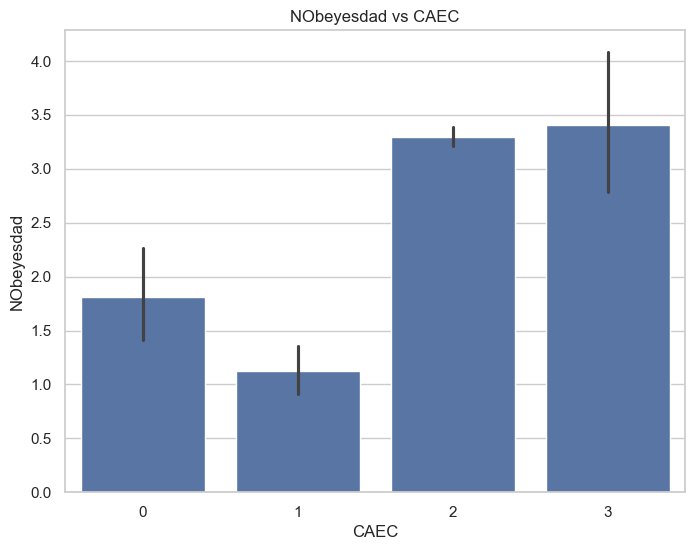

In [66]:
# NObeyesdad vs Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['CAEC'], y=df['NObeyesdad'])
plt.xlabel('CAEC')
plt.ylabel('NObeyesdad')
plt.title('NObeyesdad vs CAEC')
plt.show()

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
# 90/10 train test split

print(features_df.shape)
print(targets_df.shape)
x_train, x_test, y_train, y_test = train_test_split(features_df, targets_df, test_size=0.1, random_state=10)

#Train Model. SGDRegressor uses Stochastic Gradient Descent method
model = SGDRegressor(max_iter=1, warm_start=True, tol=1e-3, learning_rate='adaptive', eta0=0.001, random_state=10)

n_iterations = 1000
mse_per_iteration = []

for i in range(n_iterations):
    model.partial_fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mse_per_iteration.append(mse)

model.coef_

(2087, 10)
(2087,)


array([ 0.25167047,  0.439258  ,  0.78282627, -0.20584294,  0.79939411,
        0.0539861 ,  0.71495033, -0.13786463, -0.00737687, -0.29518682])

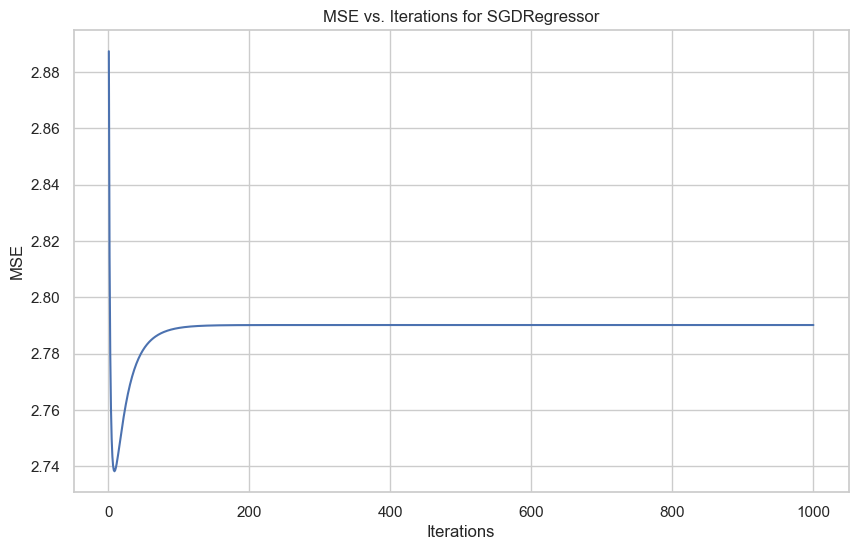

In [51]:
# Plotting MSE vs. Iterations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, n_iterations+1), y=mse_per_iteration)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("MSE vs. Iterations for SGDRegressor")
plt.show()

In [50]:


y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')

print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

R-squared (Train): 0.2530098885719284
R-squared (Test): 0.30072192011306753
MSE (Train): 2.817688753399616
MSE (Test): 2.7901645233280714
